In [27]:
import numpy as np
import pandas as pd
import collections

import tensorflow as tf # Machine Learning
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

## Read in Data

Data can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [28]:
df = pd.read_csv('data/breastcancer.csv')

df.head()# Display first five columns

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
# Drop unwanted columns.
df = df.drop(['id', 'Unnamed: 32', 'smoothness_mean', 
              'compactness_mean', 'concavity_mean', 
              'fractal_dimension_mean', 'fractal_dimension_worst',
              'concave points_mean', 'symmetry_mean' , 'radius_se',
              'texture_se', 'symmetry_worst', 'concave points_worst',
              'fractal_dimension_se', 'symmetry_se', 'concavity_se', 
              'compactness_se', 'smoothness_se','area_se', 'perimeter_se', 
              'concave points_se', 'radius_worst', 'texture_worst', 
              'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst'], axis=1)

In [30]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0


## Visualize Data

### How many patients have malignant versus benign cancer ?

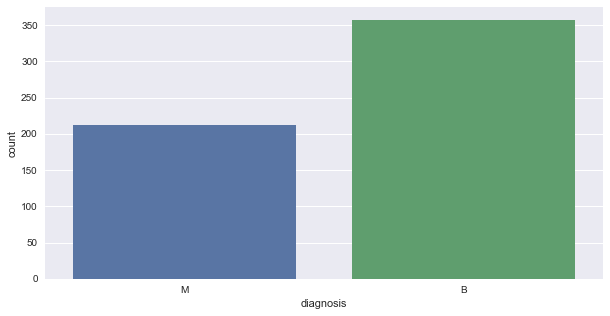

In [31]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(df['diagnosis'], label='count')

plt.show()

Diagnosis (M = malignant, B = benign) 

In [32]:
np_diagnosis = np.array(df['diagnosis'])
# Display count of M & B
collections.Counter(np_diagnosis)

Counter({'B': 357, 'M': 212})

* Malignant cancer patients: **212**
* Benign cancer patients: **357**

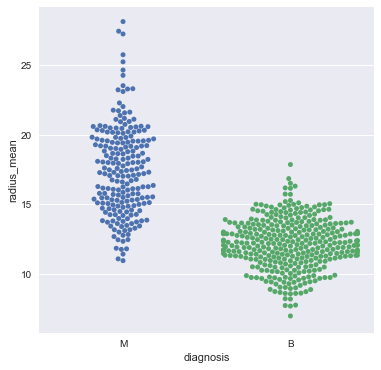

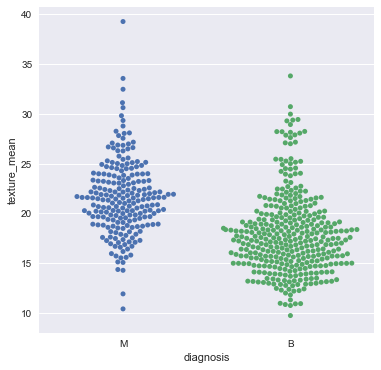

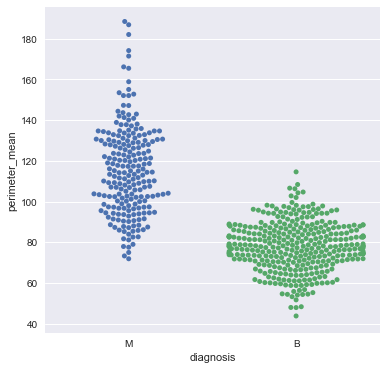

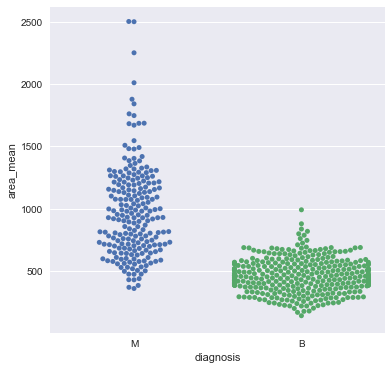

In [33]:
# Mean of radius
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['radius_mean'])
plt.show()

# Mean of texture
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['texture_mean'])
plt.show()

# Mean of perimeter
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['perimeter_mean'])
plt.show()

# Mean of area
plt.figure(figsize=(6,6))
sns.swarmplot(x=df['diagnosis'], y=df['area_mean'])
plt.show()

## Prepare data for Machine Learning

In [34]:
# Rename the value of diagnosis. 1 for Malignant and 0 for Benign
df.loc[df['diagnosis'] == "M", 'diagnosis'] = 1
df.loc[df['diagnosis'] == "B", 'diagnosis'] = 0

In [35]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,1,17.99,10.38,122.80,1001.0
1,1,20.57,17.77,132.90,1326.0
2,1,19.69,21.25,130.00,1203.0
3,1,11.42,20.38,77.58,386.1
4,1,20.29,14.34,135.10,1297.0


In [36]:
df.loc[df.diagnosis == 0, 'benign'] = 1
df.loc[df.diagnosis == 1, 'benign'] = 0

In [37]:
# Convert benign column type to integer
df['benign'] = df.benign.astype(int)

In [38]:
# Rename 'Class' to 'Malignant'.
df = df.rename(columns={'diagnosis': 'malignant'})

In [39]:
df.head()

,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,benign
0,1,17.99,10.38,122.80,1001.0,0
1,1,20.57,17.77,132.90,1326.0,0
2,1,19.69,21.25,130.00,1203.0,0
3,1,11.42,20.38,77.58,386.1,0
4,1,20.29,14.34,135.10,1297.0,0


In [40]:
Malignant = df[df.malignant == 1]
Benign = df[df.benign == 1]

In [41]:
Malignant.head()

,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,benign
0,1,17.99,10.38,122.80,1001.0,0
1,1,20.57,17.77,132.90,1326.0,0
2,1,19.69,21.25,130.00,1203.0,0
3,1,11.42,20.38,77.58,386.1,0
4,1,20.29,14.34,135.10,1297.0,0


In [42]:
Benign.head()

,malignant,radius_mean,texture_mean,perimeter_mean,area_mean,benign
19,0,13.540,14.36,87.46,566.3,1
20,0,13.080,15.71,85.63,520.0,1
21,0,9.504,12.44,60.34,273.9,1
37,0,13.030,18.42,82.61,523.8,1
46,0,8.196,16.84,51.71,201.9,1


In [43]:
train_X = pd.concat([Malignant, Benign], axis=0)

In [44]:
train_X = train_X.drop(columns=['texture_mean', 'radius_mean'])

In [45]:
train_X.head()

,malignant,perimeter_mean,area_mean,benign
0,1,122.80,1001.0,0
1,1,132.90,1326.0,0
2,1,130.00,1203.0,0
3,1,77.58,386.1,0
4,1,135.10,1297.0,0


In [46]:
train_Y = pd.concat([train_X['malignant'], train_X['benign']], axis=1)
train_Y.shape

(569, 2)

In [47]:
train_Y.head()

,malignant,benign
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:
#Drop target features from train_X.
train_X = train_X.drop(['malignant','benign'], axis = 1)
train_X.shape

(569, 2)

In [49]:
input_X = train_X.as_matrix()
input_Y = train_Y.as_matrix()

In [50]:
input_X

array([[ 122.8 , 1001.  ],
       [ 132.9 , 1326.  ],
       [ 130.  , 1203.  ],
       ...,
       [  91.38,  600.4 ],
       [  70.67,  386.  ],
       [  47.92,  181.  ]])

In [51]:
input_Y 

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

## Build Neural Network

In [52]:
# Hyperparameters
learning_rate = 0.1
epochs = 2500
batch_size = 30

In [53]:
# Input data gateways
X = tf.placeholder(tf.float32, [None, 2], name='X')
Y = tf.placeholder(tf.float32, [None, 2], name='Y')

In [54]:
# create weights
W = tf.Variable(tf.random_normal([2, 2]), name='Weights')

In [55]:
# create biases
b = tf.Variable(tf.random_normal([2]), name='Biases')

In [56]:
# operation
Y_hat = tf.matmul(X, W) + b

In [57]:
# Loss function
loss = tf.reduce_mean(tf.square(Y_hat - Y))

In [58]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## Training

In [59]:
sess = tf.Session()

with sess.as_default():
    # initialize 
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./house', sess.graph)

    
#training 
for i in range(epochs):
    sess.run([optimizer], 
              feed_dict = {
              X: input_X, 
              Y: input_Y
            })

    
    if (i) % 50 == 0:
        cc = sess.run(loss, feed_dict={ X: input_X, Y: input_Y})
        
        print('Epochs: {}'.format(i), 'Loss:', '{:.9f}'.format(cc))
print('Optimization Finished!')
training_loss = sess.run(loss, feed_dict={ X: input_X, Y: input_Y })
print('Loss =', training_loss, 'Weight =', sess.run(W), 'Bias =', sess.run(b))     

writer.close()

Epochs: 0 Loss: 448189.375000000
Epochs: 50 Loss: 1096.437377930
Epochs: 100 Loss: 252.176483154
Epochs: 150 Loss: 182.223602295
Epochs: 200 Loss: 128.665725708
Epochs: 250 Loss: 86.551773071
Epochs: 300 Loss: 55.611610413
Epochs: 350 Loss: 34.181129456
Epochs: 400 Loss: 20.125041962
Epochs: 450 Loss: 11.372241020
Epochs: 500 Loss: 6.188134193
Epochs: 550 Loss: 3.263663292
Epochs: 600 Loss: 1.690714478
Epochs: 650 Loss: 0.883504808
Epochs: 700 Loss: 0.488078773
Epochs: 750 Loss: 0.303118378
Epochs: 800 Loss: 0.220483750
Epochs: 850 Loss: 0.185194269
Epochs: 900 Loss: 0.170754731
Epochs: 950 Loss: 0.165052310
Epochs: 1000 Loss: 0.162831202
Epochs: 1050 Loss: 0.161926866
Epochs: 1100 Loss: 0.161493033
Epochs: 1150 Loss: 0.161215991
Epochs: 1200 Loss: 0.160985321
Epochs: 1250 Loss: 0.160764381
Epochs: 1300 Loss: 0.160541371
Epochs: 1350 Loss: 0.160312891
Epochs: 1400 Loss: 0.160077915
Epochs: 1450 Loss: 0.159836248
Epochs: 1500 Loss: 0.159587592
Epochs: 1550 Loss: 0.159332082
Epochs: 1600

Loss = 0.153507188

## Visualize data 

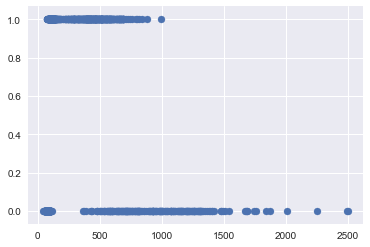

In [60]:
plt.scatter(input_X, input_Y, alpha=1)
plt.show()

## Prediction

In [62]:
results = sess.run(Y_hat, feed_dict = {X: input_X})

In [63]:
# model predicted correct 6/6 
results 

array([[ 0.60612106,  0.56337714],
       [ 1.0511551 , -0.14064166],
       [ 0.8710239 ,  0.15829757],
       ...,
       [ 0.29823542,  0.76289177],
       [ 0.18285829,  0.73249567],
       [ 0.10993919,  0.59958446]], dtype=float32)